In [ ]:
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

def plot_sankey(
  e_input = None,
  e_useful = None,
  e_wasted = None,
  efficiency = None,
):

  n_provided_values = sum([1 for val in [e_useful, e_input, e_wasted, efficiency] if val is not None])

  assert n_provided_values == 2, "Error: Please provide exactly two of the four values."

  if e_useful is not None and e_input is not None:
    assert e_input > 0., "Error: e_input cannot be zero."
    e_wasted = e_input - e_useful
    efficiency = e_useful / e_input

  elif e_useful is not None and e_wasted is not None:
    e_input = e_useful + e_wasted
    assert e_input > 0., "Error: e_input cannot be zero."
    efficiency = e_useful / e_input

  elif e_useful is not None and efficiency is not None:
    assert efficiency > 0., "Error: efficiency cannot be zero when e_useful is non-zero."
    e_input = e_useful / efficiency
    e_wasted = e_input - e_useful

  elif e_input is not None and efficiency is not None:
    e_useful = efficiency * e_input
    e_wasted = e_input - e_useful

  elif e_input is not None and e_wasted is not None:
    e_useful = e_input - e_wasted, "Error: e_input cannot be zero."
    efficiency = e_useful / e_input

  elif e_wasted is not None and efficiency is not None:
    assert efficiency < 1., "Error: e_input cannot be 1 when e_wasted is non-zero."
    e_input = e_wasted / (1 - efficiency)
    e_useful = e_input - e_wasted

  fig, ax = plt.subplots()

  ax.axis('off')

  Sankey(
    ax = ax,
    unit = ' J',
    scale = .4 / e_input,
    labels = ['Input', 'Useful', 'Wasted'],
    flows = [e_input, -e_useful, -e_wasted],
    orientations = [0, 0, -1],
    pathlengths=[.4, .3, .3],
    patchlabel=f' efficiency {efficiency:.2f}'
  ).finish()

  plt.show()

Set 2 of the 4 values here and set the others to `None`

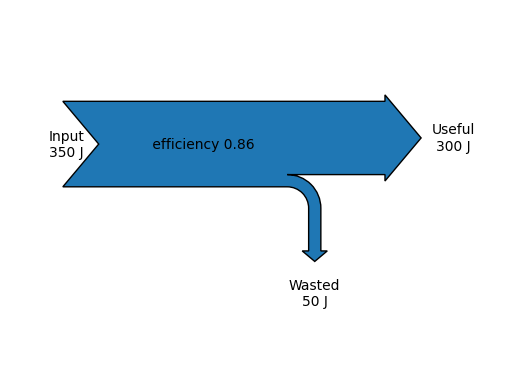

In [ ]:
plot_sankey(
  e_input = None,
  e_useful = 300,
  e_wasted = 50,
  efficiency = None,
)